In [1]:
pip install pandas numpy scikit-learn statsmodels openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

In [3]:
file_path = 'filled_potato_price and arrival.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])


C:\Users\agnid\AppData\Local\Temp/ipykernel_8204/1258276688.py:1: UserWarning: Parsing '13-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\agnid\AppData\Local\Temp/ipykernel_8204/1258276688.py:1: UserWarning: Parsing '14-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\agnid\AppData\Local\Temp/ipykernel_8204/1258276688.py:1: UserWarning: Parsing '15-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\agnid\AppData\Local\Temp/ipykernel_8204/1258276688.py:1: UserWarning: Parsing '16-04-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\agnid\AppDa

In [5]:
data.fillna(method='ffill', inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Month', 'weekday', 'Season', 'Climate'], drop_first=True)

In [6]:
X = data.drop(columns=['Date', 'Price'])
y = data['Price']


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_dt = dt.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Decision Tree RMSE: {rmse_dt}')


Random Forest RMSE: 390.1267093475419
Gradient Boosting RMSE: 390.8238637074622
Decision Tree RMSE: 526.1030204169351


In [17]:
import matplotlib.pyplot as plt


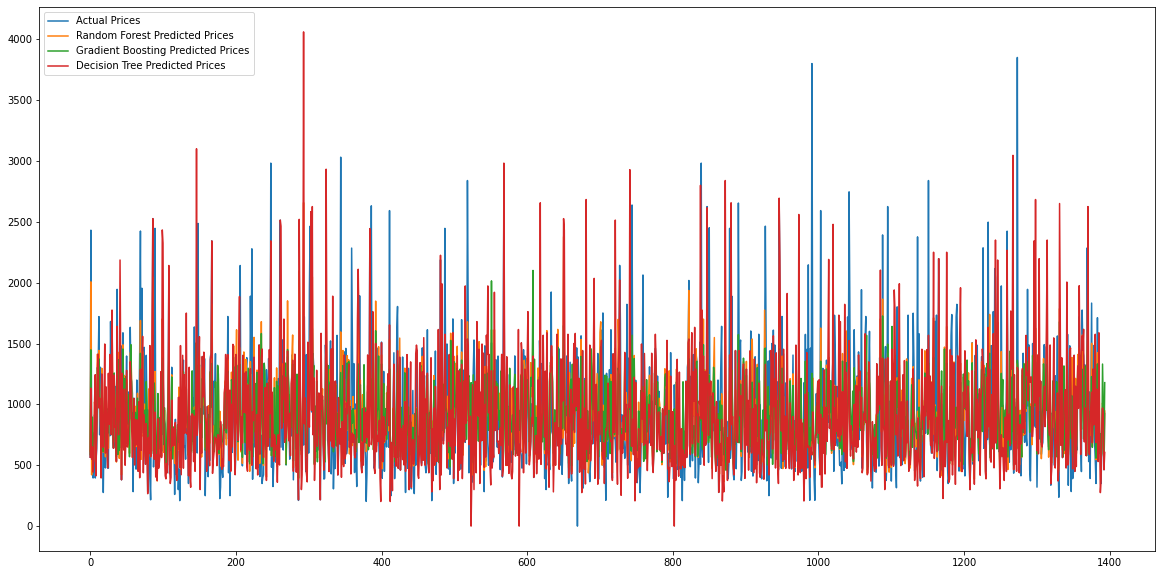

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_rf, label='Random Forest Predicted Prices')
plt.plot(y_pred_gb, label='Gradient Boosting Predicted Prices')
plt.plot(y_pred_dt, label='Decision Tree Predicted Prices')
plt.legend()
plt.show()

In [19]:
data.set_index('Date', inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [20]:
arima_model = ARIMA(data['Price'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=60)  # Forecast for 2 months (60 days)


C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWa

In [21]:
sarima_model = SARIMAX(data['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=60)

C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWa

In [22]:
forecast_dates = [data.index[-1] + timedelta(days=i) for i in range(1, 61)]
forecast_df = pd.DataFrame({'Date': forecast_dates, 'ARIMA_Price': arima_forecast, 'SARIMA_Price': sarima_forecast})

In [23]:
forecast_df.to_excel('potato_price_forecast.xlsx', index=False)
print('Forecast saved to potato_price_forecast.xlsx')

Forecast saved to potato_price_forecast.xlsx
